In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
n = 1
nn = 15

In [3]:
xd = np.array([1, 2, 2.5, 3.5, 4.5, 6, 7, 7, 9, 10, 11, 11.5, 12, 12.5, 13])
yd = np.array([5.5, 3.5, 2.5, 2, 1.5, 2.5, 5, 4, 7.5, 8, 7, 7.5, 6.5, 6.5, 5.5])

In [4]:
yd.shape

(15,)

In [5]:
m = 2

In [6]:
w_1 = np.random.random((m,n+1)) - 0.5
w_2 = np.random.random((m+1,1)) - 0.5
print(f'w_1 = {w_1}')
print(f'w_2 = {w_2}')

w_1 = [[ 0.37446419 -0.3064667 ]
 [-0.31347922  0.39024151]]
w_2 = [[ 0.06455797]
 [-0.49727982]
 [ 0.24872705]]


In [7]:
h = 0.007
a = 1
nepox = 10000

In [8]:
e2 = np.zeros(nepox)
w1g = np.zeros((4,nepox))
w2g = np.zeros((3,nepox))

In [9]:
for k in range(nepox):
    p = np.random.random()
    q = np.random.random()
    r = np.random.random()
    df2 = np.zeros(3)
    dw1 = np.zeros((m,n+1))
    dw2 = np.zeros((m+1,1))
    e1 = 0
    x = np.zeros(3)
    d = np.zeros(3)
    z = np.zeros(m+1)

    for i in range(nn):
        x = np.array([1,xd[i]])
        y = yd[i]
        u = w_1 @ x
        z[0] = 1
        z[1:] = 1/(1 + np.exp(-a*u))
        yp = w_2.T @ z.T
        e = y - yp
        e1 = e1 + e*e
        dw2 = dw2 + e * np.expand_dims(z, axis=0).T
        for j in range(m):
            df = a*z[j+1]*(1-z[j+1])
            for l in range(n+1):
                dw1[j,l] = dw1[j,l] + e*df*w_2[j+1]*x[l]
    w_1 += h*dw1
    w_2 += h*dw2
    e2[k] = e1
    w1g[:,k] = [w_1[0,0], w_1[1,0], w_1[0,1], w_1[1,1]]
    w2g[:,k] = [w_2[0,0], w_2[1,0], w_2[2,0]]

In [10]:
rr = 121
xr = np.zeros(rr)
yr = np.zeros(rr)

In [11]:
for i in range(121):
    xt = 1 + 0.1*(i-1)
    x = [1, xt]
    u = w_1 @ x
    z = np.zeros(m+1)
    z[0] = 1
    z[1:] = 1/(1 + np.exp(-a*u))
    xr[i] = xt
    yr[i] = w_2.T @ z.T


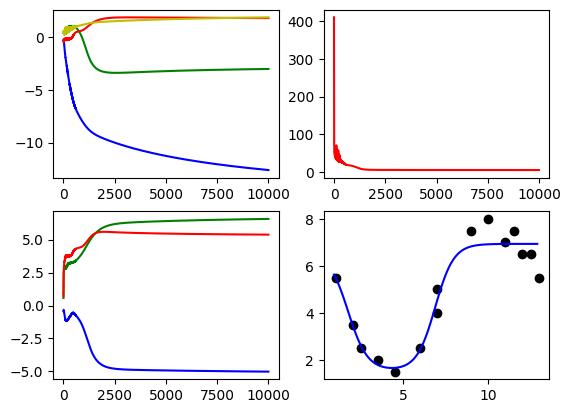

In [12]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(w1g[0,:], '-g')
ax[0,0].plot(w1g[1,:], '-b')
ax[0,0].plot(w1g[2,:], '-r')
ax[0,0].plot(w1g[3,:], '-y')
# ax[0,0].grid(True)

ax[0,1].plot(e2,'r')

ax[1,0].plot(w2g[0,:], '-g')
ax[1,0].plot(w2g[1,:], '-b')
ax[1,0].plot(w2g[2,:], '-r')

ax[1,1].plot(xd, yd,'ok')
ax[1,1].plot(xr, yr,'-b')

# # Set axis limits
# ax.set_xlim(0, 6)
# ax.set_ylim(0, 6)

# Show the plot
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()